# How-to: Visualise and interact with HTI plots.

Daniel Sanchez-Rivas<sup>1</sup> and Miguel A. Rico-Ramirez<sup>1</sup>

<sup>1</sup>Department of Civil Engineering, University of Bristol, Bristol, BS8 1TR, United Kingdom

## This notebook displays an HTI plot using Quasi-Vertical-Profiles built from 9&deg; elevation angle scans.

Chenies C-band rain radar dual-polarisation products are available at https://catalogue.ceda.ac.uk/uuid/bb3c55e36b4a4dc8866f0a06be3d475b (Met Office, 2013)

### Import relevant packages


In [1]:
import pickle
import towerpy as tp
from IPython import get_ipython

# %matplotlib notebook


You are using the Towerpy framework, an open source library for
working with polarimetric weather radar data.

If you find our work useful for your research, please consider citing our
following publication:

https://doi.org/10.1016/j.envsoft.105746.2023



### We load data that were previously processed to generate single QVPs (using the *pol_qvps* function) and to detect the ML signatures within each profile (using the *ml_detection* function).

In [8]:
RSITE = 'chenies'
WDIR = f'../../../datasets/ukmo-nimrod/data/single-site/2020/{rsite}/spel4/'

with open(WDIR+'qvps.tpy', 'rb') as f:
    rprofs = pickle.load(f)

with open(WDIR+'mlyrsqvps.tpy', 'rb') as f:
    rmlyr = pickle.load(f)

# These objects were created with a previous version of Towerpy,
# so it is necessary to update the pof_type argument to agree with the latest release.
for i in rprofs:
    i.profs_type = 'QVPs'

/tmp/ipykernel_30276/1815539117.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  rprofs = pickle.load(f)


### The **rad_interactive** module

This module helps explore the HTI plots. For instance, the **user can click within the HTI plot to display a single QVP.** The right panel of the plot shows the selected QVP. Additionally, the polarimetric variable can be switched using the bottoms at the top of the panel.

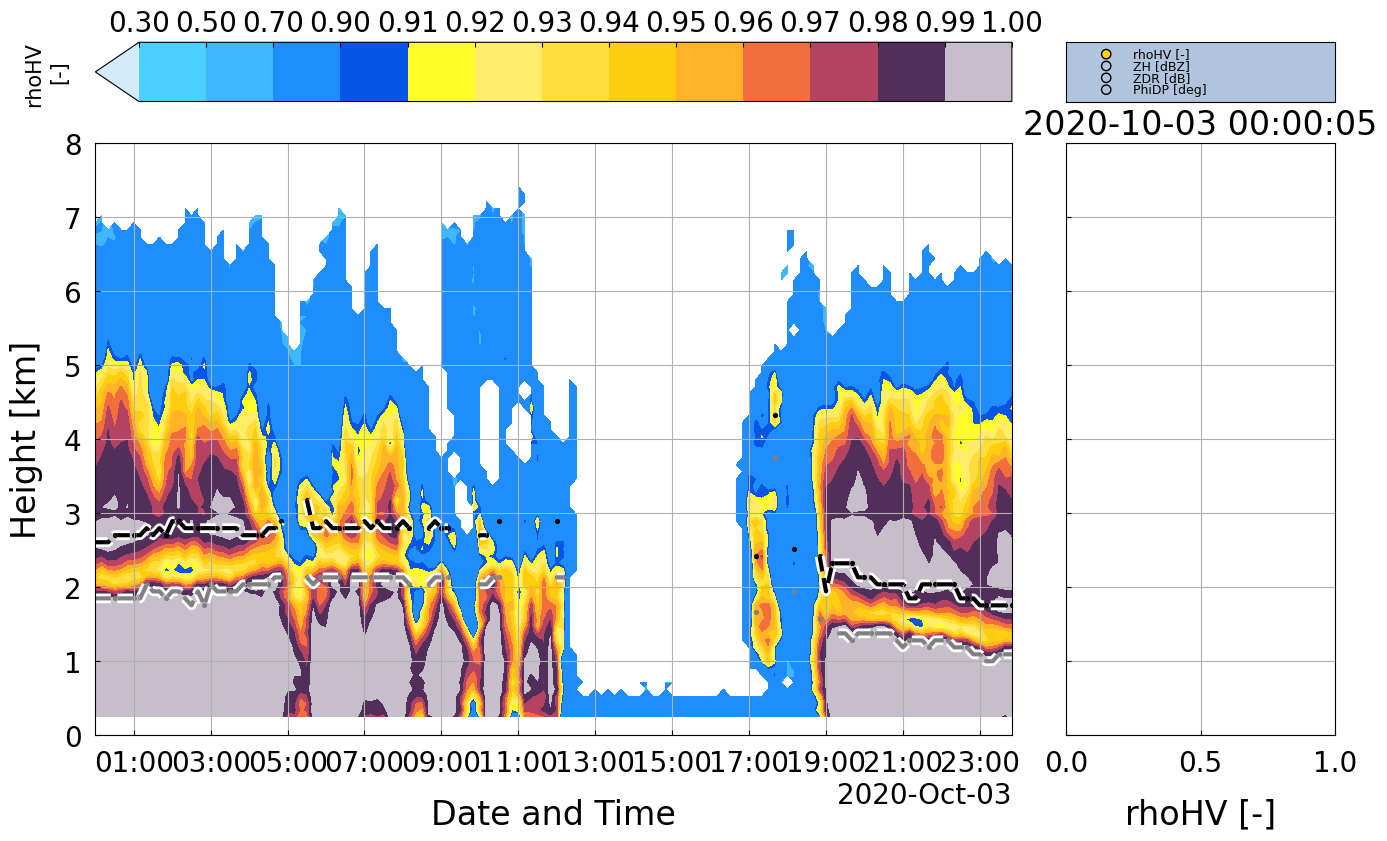

0

In [9]:
radb = tp.datavis.rad_interactive.hti_base(rprofs, mlyrs=rmlyr, stats='std_dev',
                                           ptype='fcontour',
                                           var2plot='rhoHV [-]',
                                           # contourl='ZH [dBZ]',
                                           htiylim=[0, 8], tz='Europe/London')
radexpvis = tp.datavis.rad_interactive.HTI_Int()
radb.on_clicked(radexpvis.hzfunc)

## References

Met Office: Chenies C-band rain radar dual polar products, NCAS British Atmospheric Data Centre [data set], https://catalogue.ceda.ac.uk/uuid/bb3c55e36b4a4dc8866f0a06be3d475b, 2013.
